# МИНОБРНАУКИ РОССИИ федеральное государственное бюджетное образовательное учреждение высшего образования "Череповецкий государственный университет"

**Институт:** Информационных технологий
**Кафедра:** Математики и информатики
**Студент группы:** 1ПМБ-02-1оп-21
**Направление подготовки**: 01.04.02 Прикладная математика и информатика
**ФИО:** Тимофеенко Никита Вячеславович
**Руководитель:** Мухин Владимир Васильевич
**Должность:** профессор
**Дата предстваления работы:** <<12>> декабря 2023 г.

# Лабораторная работа 2

## Цели работы:

1. **Повторение и анализ поисковых алгоритмов минимизации функции одной переменной**: Освежить и углубить понимание различных алгоритмов поиска минимума функции одной переменной.

2. **Реализация алгоритмов с помощью пакетов прикладных программ**: Изучить и освоить практическое применение данных алгоритмов, используя современные инструменты и пакеты прикладного ПО.

## Постановка задачи

1. **Определение**: Требуется найти такую точку $ \large x^*$ в области действительных чисел $ \large \mathbb{R}$, для которой выполняется условие $ \large f(x*) = \min_{x \in \mathbb{R}} f(x)$

2. **Методы одномерной минимизации**: Для поиска минимума используется начальный интервал неопределенности $ \large L = [a_0, b_0]$

3. **Предположение**: Считается, что минимум $ \large x^*$ находится в пределах интервала $ \large L_0$, но его точное положение заранее неизвестно.

## Требования к работе

1. **Поиск начального интервала неопределенности**:
   - Применить алгоритм Свенна для определения начального интервала неопределенности, используя заданную начальную точку.

2. **Нахождение минимума заданной функции методом конфигураций**:
   - Функция, минимум которой необходимо найти, определена следующим образом:
$$
\large
f(x) =
\begin{cases}
(\cos(x) - e \cdot x^2)^2, & \text{если} x \geq 0 \\
1 - x, & \text{если } x < 0
\end{cases}
$$



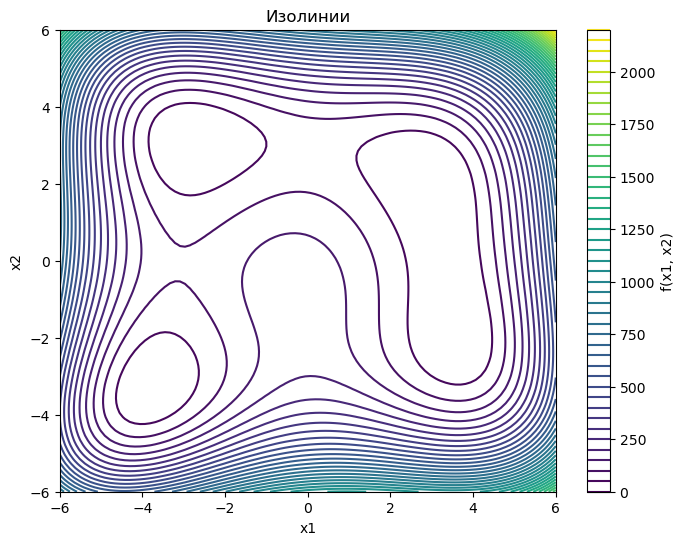

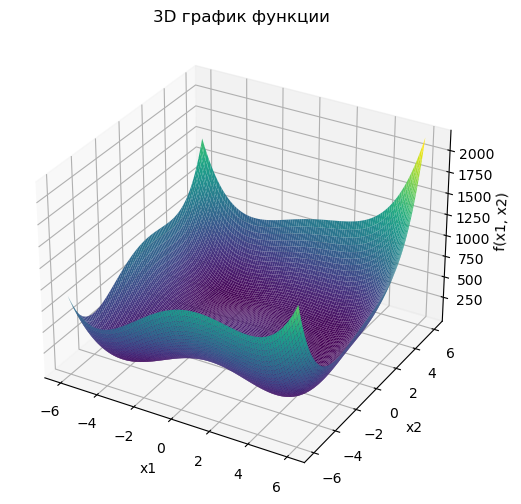

In [7]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt



class Function:
    """
    Класс Function для анализа и визуализации поведения заданной функции.
    """

    def __init__(self):
        """
        Инициализирует экземпляр класса Function.
        Создаёт символьную переменную и определяет две части функции:
        одна для положительных значений x и другая для отрицательных.
        """
        self.x1 = sp.symbols('x1')
        self.x2 = sp.symbols('x2')

    @staticmethod
    def f(x1, x2):
        """
        :param x1:
        :param x2:
        :return:
        """
        return (x1 ** 2 + x2 - 11) ** 2 + (x1 + x2 ** 2 - 7) ** 2

    def plot_contours(self, x1_range, x2_range, resolution=100):
        """
        Визуализирует поверхности уровня функции.

        :param x1_range: кортеж (min, max) для значений x1.
        :param x2_range: кортеж (min, max) для значений x2.
        :param resolution: разрешение сетки для вычислений.
        """
        x1 = np.linspace(x1_range[0], x1_range[1], resolution)
        x2 = np.linspace(x2_range[0], x2_range[1], resolution)
        X1, X2 = np.meshgrid(x1, x2)
        Z = self.f(X1, X2)

        plt.figure(figsize=(8, 6))
        plt.contour(X1, X2, Z, levels=50, cmap='viridis')
        plt.title('Изолинии')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.colorbar(label='f(x1, x2)')
        plt.show()

    def plot_3d(self, x1_range, x2_range, resolution=100):
        """
        Визуализирует 3D график функции.

        :param x1_range: кортеж (min, max) для значений x1.
        :param x2_range: кортеж (min, max) для значений x2.
        :param resolution: разрешение сетки для вычислений.
        """
        x1 = np.linspace(x1_range[0], x1_range[1], resolution)
        x2 = np.linspace(x2_range[0], x2_range[1], resolution)
        X1, X2 = np.meshgrid(x1, x2)
        Z = self.f(X1, X2)

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        ax.set_title('3D график функции')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')
        plt.show()

# Создание экземпляра класса и вызов метода визуализации
func = Function()
func.plot_contours(x1_range=(-6, 6), x2_range=(-6, 6))
func.plot_3d(x1_range=(-6, 6), x2_range=(-6, 6))

In [45]:
# Добавление констант для алгоритма случайного адаптивного поиска в класс Config

class Config:
    """
    Класс конфигурации для хранения констант.

    Атрибуты:
    - START_POINTS: Начальные точки
    - HOOKE_JEEVES_INITIAL_DELTA: Начальные величины шагов для метода Хука-Дживса.
    - HOOKE_JEEVES_LAMBDA: Ускоряющий множитель для метода Хука-Дживса.
    - HOOKE_JEEVES_ALPHA: Коэффициент уменьшения шага для метода Хука-Дживса.
    - EPSILON: Константа различимости.
    - RANDOM_ADAPTIVE_ALPHA: Коэффициент расширения для случайного адаптивного поиска.
    - RANDOM_ADAPTIVE_BETA: Коэффициент сжатия для случайного адаптивного поиска.
    - RANDOM_ADAPTIVE_M: Максимальное число неудачных испытаний на итерации.
    - RANDOM_ADAPTIVE_T0: Начальная величина шага.
    - RANDOM_ADAPTIVE_R: Минимальная величина шага.
    - RANDOM_ADAPTIVE_N: Максимальное число итераций.
    """

    # Параметры для метода Хука-Дживса
    START_POINTS = [
        [1, 1],
        [-1, 1],
        [-1, -1],
        [2, -1]
    ]

    HOOKE_JEEVES_INITIAL_DELTA = [0.5, 0.5]
    HOOKE_JEEVES_LAMBDA = 2
    HOOKE_JEEVES_ALPHA = 2
    EPSILON = 0.0001

    # Параметры для метода случайного адаптивного поиска
    RANDOM_ADAPTIVE_ALPHA = 1.618
    RANDOM_ADAPTIVE_BETA = 0.618
    RANDOM_ADAPTIVE_N = 100
    RANDOM_ADAPTIVE_M = 3
    RANDOM_ADAPTIVE_T0 = 1
    RANDOM_ADAPTIVE_R = 0.001



![](hooke_jeeves.png)

In [38]:
import pandas as pd


class MultiDimensionalOptimizationMethods:
    """
    Класс для реализации различных методов оптимизации одномерных функций.
    Предназначен для поиска минимума функции с использованием различных алгоритмов.
    """
    def __init__(self, function):
        """
        Инициализация класса.
        :param function: Функция, минимум которой необходимо найти.
        """
        self.function = function

    def hooke_jeeves(self, x0, epsilon, delta, lam, alpha):
        """
        Метод Хука-Дживса для поиска минимума функции.
        :param x0: Начальная точка.
        :param epsilon: Порог остановки алгоритма.
        :param delta: Начальные величины шагов по координатам.
        :param lam: Ускоряющий множитель.
        :param alpha: Коэффициент уменьшения шага.
        :return: Примерное значение минимума функции.
        """
        def exploratory_search(y, delta):
            for i in range(len(y)):
                y_plus = y.copy()
                y_plus[i] += delta[i]
                if self.function(*y_plus) < self.function(*y):
                    y = y_plus
                    continue

                y_minus = y.copy()
                y_minus[i] -= delta[i]
                if self.function(*y_minus) < self.function(*y):
                    y = y_minus

            return y

        k = 0
        x_k = x0
        y = x0
        iterations_data = []
        while True:
            y_prev = y.copy()
            y = exploratory_search(y, delta)
            if self.function(*y) < self.function(*x_k):
                x_k1 = y
                y = [y[i] + lam * (y[i] - x_k[i]) for i in range(len(y))]
                x_k = x_k1
                k += 1
            else:
                if all(d <= epsilon for d in delta):
                    iterations_data.append({'iteration': k, 'x': x_k, 'f_x': self.function(*x_k), 'delta': delta})
                    return iterations_data
                delta = [d / alpha for d in delta]
                y = x_k
                iterations_data.append({'iteration': k, 'x': y_prev, 'f_x': self.function(*y_prev), 'delta': delta})
                k += 1

    def create_dataframe_hooke_jeeves(self, start_points, epsilon, delta, lam, alpha):
        """
        Создание pandas DataFrame с данными всех итераций для каждой начальной точки.
        """
        columns = ['Start Point', 'Iteration', 'X1', 'X2', 'Function Value', 'Delta']
        results_df = pd.DataFrame(columns=columns)
        for point in start_points:
            iterations_data = self.hooke_jeeves(point, epsilon, delta, lam, alpha)
            for data in iterations_data:
                results_df = results_df.append({
                    'Start Point': point,
                    'Iteration': data['iteration'],
                    'X1': data['x'][0],
                    'X2': data['x'][1],
                    'Function Value': data['f_x'],
                    'Delta': data['delta']
                }, ignore_index=True)
        return results_df

    def random_adaptive_search(self, x0, alpha, beta, M, t0, R, N):
        """
        Метод случайного адаптивного поиска.
        """
        def random_unit_vector(dim):
            v = np.random.uniform(-1, 1, dim)
            norm = np.linalg.norm(v)
            return v / norm if norm != 0 else v

        k = 0
        j = 1
        x_k = np.array(x0)
        t_k = t0
        iterations_data = []

        while k < N:
            xi_j = random_unit_vector(len(x0))
            y_j = x_k + t_k * xi_j
            f_y_j = self.function(*y_j)
            f_x_k = self.function(*x_k)

            if f_y_j < f_x_k:
                z_j = x_k + alpha * (y_j - x_k)
                f_z_j = self.function(*z_j)
                if f_z_j < f_x_k:
                    x_k = z_j
                    t_k *= alpha
                    k += 1
                    j = 1
                else:
                    j += 1
            else:
                j += 1

            iterations_data.append({'iteration': k, 'x': x_k.tolist(), 'f_x': f_x_k, 't': t_k, 'j': j})

            if j > M:
                if t_k <= R:
                    break
                else:
                    t_k *= beta
                    j = 1

        return iterations_data

    def create_dataframe_random_adaptive_search(self, start_points, alpha, beta, M, t0, R, N):
        """
        Создание pandas DataFrame с данными всех итераций для каждой начальной точки.
        """
        columns = ['Start Point', 'Iteration', 'X1', 'X2', 'Function Value', 'Step Size', 'Current Step']
        results_df = pd.DataFrame(columns=columns)
        for point in start_points:
            iterations_data = self.random_adaptive_search(point, alpha, beta, M, t0, R, N)
            for data in iterations_data:
                results_df = results_df.append({
                    'Start Point': point,
                    'Iteration': data['iteration'],
                    'X1': data['x'][0],
                    'X2': data['x'][1],
                    'Function Value': data['f_x'],
                    'Step Size': data['t'],
                    'Current Step': data['j']
                }, ignore_index=True)
        return results_df


In [46]:
minimum_hj = MultiDimensionalOptimizationMethods(function=Function.f)


hooke_jeeves_df = minimum_hj.create_dataframe_hooke_jeeves(
    start_points=Config.START_POINTS,
    epsilon=Config.EPSILON,
    delta=Config.HOOKE_JEEVES_INITIAL_DELTA,
    alpha=Config.HOOKE_JEEVES_ALPHA,
    lam=Config.HOOKE_JEEVES_LAMBDA
)

hooke_jeeves_df

C:\Users\morph\AppData\Local\Temp\ipykernel_24012\2708487382.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\morph\AppData\Local\Temp\ipykernel_24012\2708487382.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\morph\AppData\Local\Temp\ipykernel_24012\2708487382.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\morph\AppData\Local\Temp\ipykernel_24012\2708487382.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\morph\AppData\Local\Temp\ipykernel_24012\270848

,Start Point,Iteration,X1,X2,Function Value,Delta
0,"[1, 1]",2,6.0,3.0,848.0,"[0.25, 0.25]"
1,"[1, 1]",3,3.0,2.0,0.0,"[0.125, 0.125]"
2,"[1, 1]",4,3.0,2.0,0.0,"[0.0625, 0.0625]"
3,"[1, 1]",5,3.0,2.0,0.0,"[0.03125, 0.03125]"
4,"[1, 1]",6,3.0,2.0,0.0,"[0.015625, 0.015625]"
5,"[1, 1]",7,3.0,2.0,0.0,"[0.0078125, 0.0078125]"
6,"[1, 1]",8,3.0,2.0,0.0,"[0.00390625, 0.00390625]"
7,"[1, 1]",9,3.0,2.0,0.0,"[0.001953125, 0.001953125]"
8,"[1, 1]",10,3.0,2.0,0.0,"[0.0009765625, 0.0009765625]"
9,"[1, 1]",11,3.0,2.0,0.0,"[0.00048828125, 0.00048828125]"


![](random_search.png)

In [47]:
minimum_rs = MultiDimensionalOptimizationMethods(function=Function.f)

random_search_df = minimum_rs.create_dataframe_random_adaptive_search(
    start_points=Config.START_POINTS,
    alpha=Config.RANDOM_ADAPTIVE_ALPHA,
    beta=Config.RANDOM_ADAPTIVE_BETA,
    M=Config.RANDOM_ADAPTIVE_M,
    t0=Config.RANDOM_ADAPTIVE_T0,
    R=Config.RANDOM_ADAPTIVE_R,
    N=Config.RANDOM_ADAPTIVE_N
)

random_search_df

C:\Users\morph\AppData\Local\Temp\ipykernel_24012\2708487382.py:135: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\morph\AppData\Local\Temp\ipykernel_24012\2708487382.py:135: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\morph\AppData\Local\Temp\ipykernel_24012\2708487382.py:135: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\morph\AppData\Local\Temp\ipykernel_24012\2708487382.py:135: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\morph\AppData\Local\Temp\ipykernel_24012\27

,Start Point,Iteration,X1,X2,Function Value,Step Size,Current Step
0,"[1, 1]",0,1,1,106,1,2
1,"[1, 1]",0,1,1,106,1,3
2,"[1, 1]",0,1,1,106,1,4
3,"[1, 1]",1,1.771324,1.636323,106,0.999924,1
4,"[1, 1]",1,1.771324,1.636323,45.272394,0.999924,2
...,...,...,...,...,...,...,...
515,"[2, -1]",14,3.583955,-1.846838,0.000032,0.001184,3
516,"[2, -1]",14,3.583955,-1.846838,0.000032,0.001184,4
517,"[2, -1]",14,3.583955,-1.846838,0.000032,0.000732,2
518,"[2, -1]",14,3.583955,-1.846838,0.000032,0.000732,3
